In [ ]:
import os
HOME = os.getcwd()
print("HOME:", HOME)



!pip install -q 'git+https://github.com/facebookresearch/segment-anything.git'

!pip install -q jupyter_bbox_widget roboflow dataclasses-json supervision==0.23.0

!mkdir -p {HOME}/weights
!wget -q https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth -P {HOME}/weights

import os

CHECKPOINT_PATH = os.path.join(HOME, "weights", "sam_vit_h_4b8939.pth")
print(CHECKPOINT_PATH, "; exist:", os.path.isfile(CHECKPOINT_PATH))

import torch

DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
MODEL_TYPE = "vit_h"

from segment_anything import sam_model_registry, SamAutomaticMaskGenerator, SamPredictor

sam = sam_model_registry[MODEL_TYPE](checkpoint=CHECKPOINT_PATH).to(device=DEVICE)

mask_generator = SamAutomaticMaskGenerator(sam)

HOME: /content
  Preparing metadata (setup.py) ... done
/content/weights/sam_vit_h_4b8939.pth ; exist: True


/usr/local/lib/python3.10/dist-packages/segment_anything/build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f)


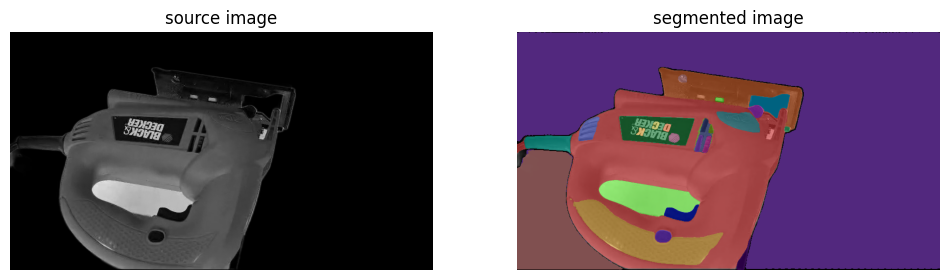

Segmented image saved to: segmented_image1.png


In [ ]:



import os

IMAGE_NAME = "/content/video1_clear_frame_31_score_306.jpg"
IMAGE_PATH = os.path.join(HOME, "data", IMAGE_NAME)

import cv2
import supervision as sv

image_bgr = cv2.imread(IMAGE_PATH)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

sam_result = mask_generator.generate(image_rgb)

mask_annotator = sv.MaskAnnotator(color_lookup=sv.ColorLookup.INDEX)

detections = sv.Detections.from_sam(sam_result=sam_result)

annotated_image = mask_annotator.annotate(scene=image_bgr.copy(), detections=detections)

sv.plot_images_grid(
    images=[image_bgr, annotated_image],
    grid_size=(1, 2),
    titles=['source image', 'segmented image']
)
output_path = "segmented_image1.png"  # Specify the file name and format
cv2.imwrite(output_path, annotated_image)

print(f"Segmented image saved to: {output_path}")


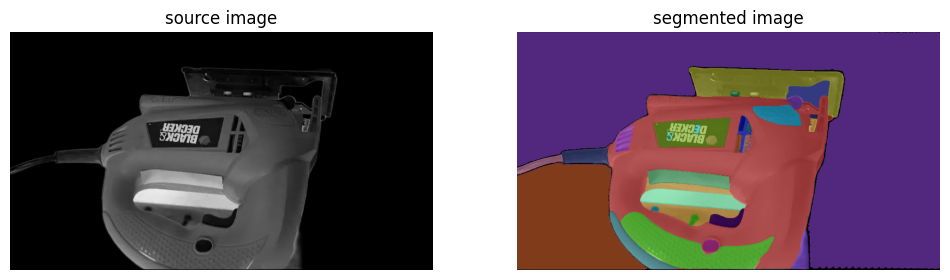

Segmented image saved to: segmented_image2.png


In [ ]:



import os

IMAGE_NAME = "/content/video2_clear_frame_30_score_306.jpg"
IMAGE_PATH = os.path.join(HOME, "data", IMAGE_NAME)

import cv2
import supervision as sv

image_bgr = cv2.imread(IMAGE_PATH)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

sam_result = mask_generator.generate(image_rgb)

mask_annotator = sv.MaskAnnotator(color_lookup=sv.ColorLookup.INDEX)

detections = sv.Detections.from_sam(sam_result=sam_result)

annotated_image = mask_annotator.annotate(scene=image_bgr.copy(), detections=detections)

sv.plot_images_grid(
    images=[image_bgr, annotated_image],
    grid_size=(1, 2),
    titles=['source image', 'segmented image']
)
output_path = "segmented_image2.png"  # Specify the file name and format
cv2.imwrite(output_path, annotated_image)

print(f"Segmented image saved to: {output_path}")


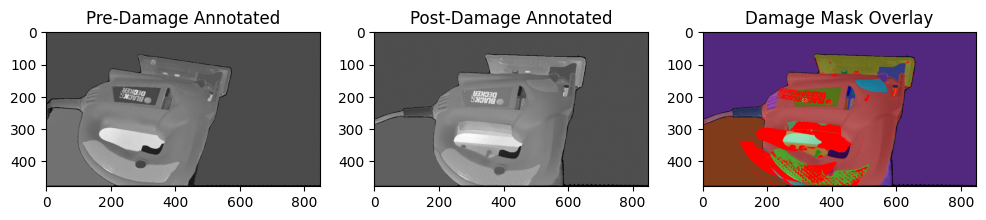

True

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load Images
pre_damage = cv2.imread("segmented_image1.png", cv2.IMREAD_GRAYSCALE)
post_damage = cv2.imread("segmented_image2.png", cv2.IMREAD_GRAYSCALE)

# Step 2: Threshold to Create Binary Masks (if not already binary)
_, pre_mask = cv2.threshold(pre_damage, 127, 1, cv2.THRESH_BINARY)
_, post_mask = cv2.threshold(post_damage, 127, 1, cv2.THRESH_BINARY)

# Step 3: Compute the Damage Mask
damage_mask = (post_mask - pre_mask).clip(0, 1)  # Highlight only new damages

# Step 4: Overlay Damage Mask on Post-Damage Image
post_damage_color = cv2.imread("segmented_image2.png")  # Load post-damage image in color
damage_overlay = post_damage_color.copy()
damage_overlay[damage_mask == 1] = [0, 0, 255]  # Highlight damages in red

# Step 5: Display Results
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title("Pre-Damage Annotated")
plt.imshow(pre_damage, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Post-Damage Annotated")
plt.imshow(post_damage, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Damage Mask Overlay")
plt.imshow(cv2.cvtColor(damage_overlay, cv2.COLOR_BGR2RGB))
plt.show()

# Step 6: Save the Damage Mask (Optional)
cv2.imwrite("damage_mask.png", (damage_mask * 255).astype(np.uint8))  # Save as a grayscale image


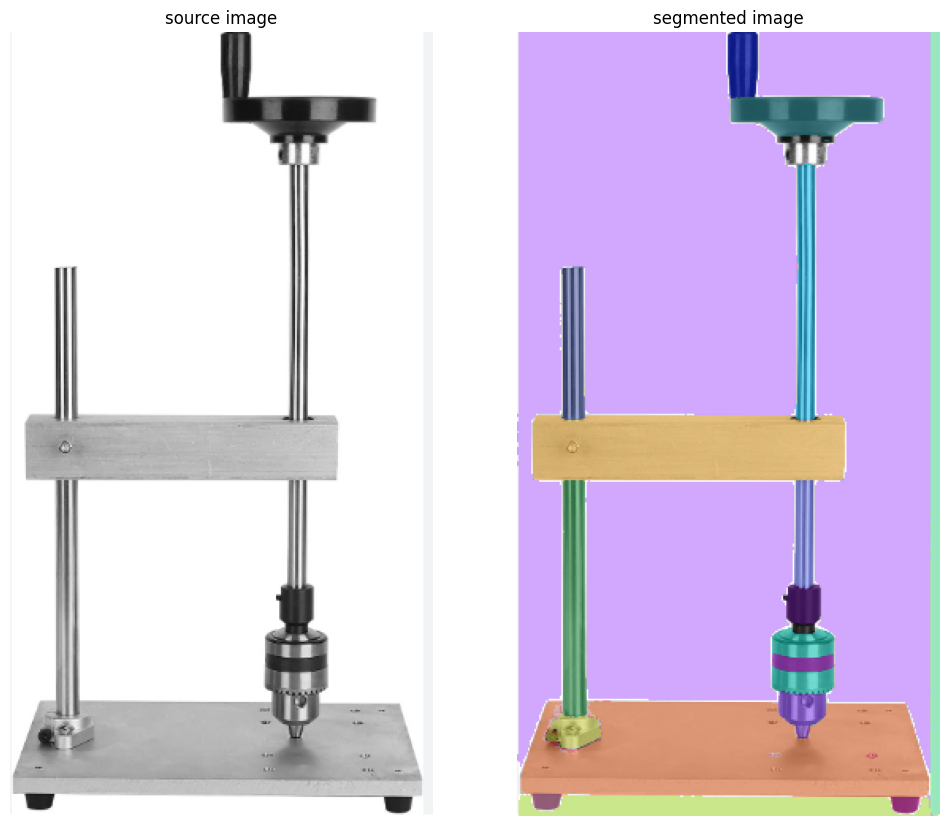

Segmented image saved to: segmented_image_stand1.png


In [ ]:



import os

IMAGE_NAME = "/content/pre_stand.png"
IMAGE_PATH = os.path.join(HOME, "data", IMAGE_NAME)

import cv2
import supervision as sv

image_bgr = cv2.imread(IMAGE_PATH)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

sam_result = mask_generator.generate(image_rgb)

mask_annotator = sv.MaskAnnotator(color_lookup=sv.ColorLookup.INDEX)

detections = sv.Detections.from_sam(sam_result=sam_result)

annotated_image = mask_annotator.annotate(scene=image_bgr.copy(), detections=detections)

sv.plot_images_grid(
    images=[image_bgr, annotated_image],
    grid_size=(1, 2),
    titles=['source image', 'segmented image']
)
output_path = "segmented_image_stand1.png"  # Specify the file name and format
cv2.imwrite(output_path, annotated_image)

print(f"Segmented image saved to: {output_path}")


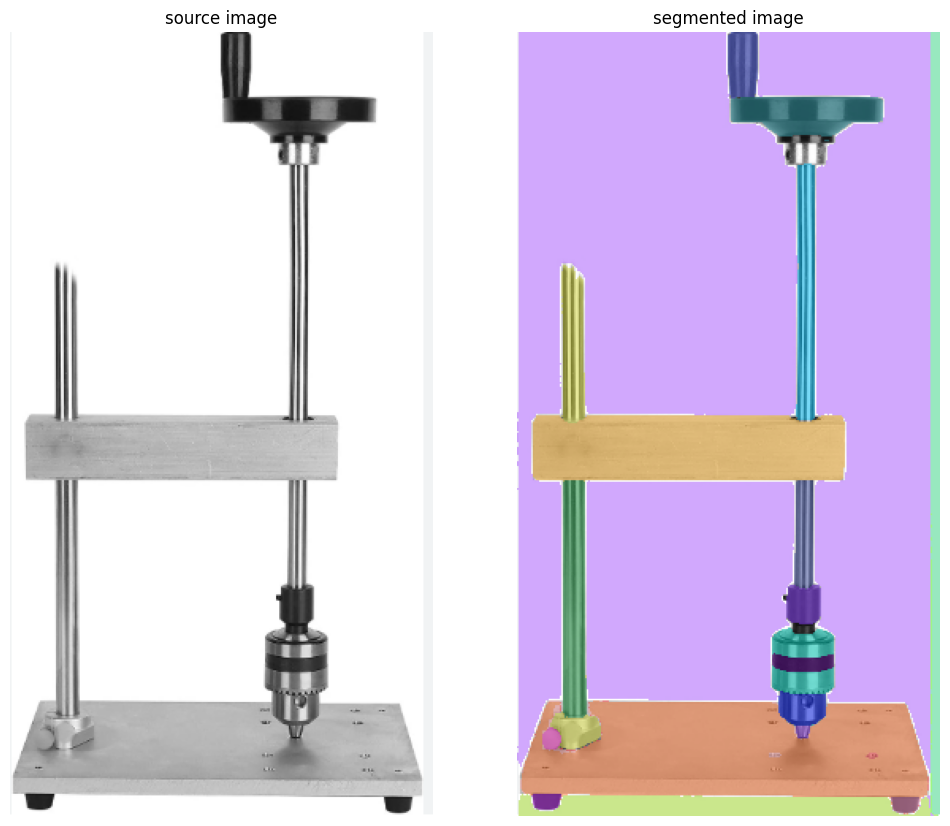

Segmented image saved to: segmented_image_stand2.png


In [ ]:



import os

IMAGE_NAME = "/content/post_stand.png"
IMAGE_PATH = os.path.join(HOME, "data", IMAGE_NAME)

import cv2
import supervision as sv

image_bgr = cv2.imread(IMAGE_PATH)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

sam_result = mask_generator.generate(image_rgb)

mask_annotator = sv.MaskAnnotator(color_lookup=sv.ColorLookup.INDEX)

detections = sv.Detections.from_sam(sam_result=sam_result)

annotated_image = mask_annotator.annotate(scene=image_bgr.copy(), detections=detections)

sv.plot_images_grid(
    images=[image_bgr, annotated_image],
    grid_size=(1, 2),
    titles=['source image', 'segmented image']
)
output_path = "segmented_image_stand2.png"  # Specify the file name and format
cv2.imwrite(output_path, annotated_image)

print(f"Segmented image saved to: {output_path}")


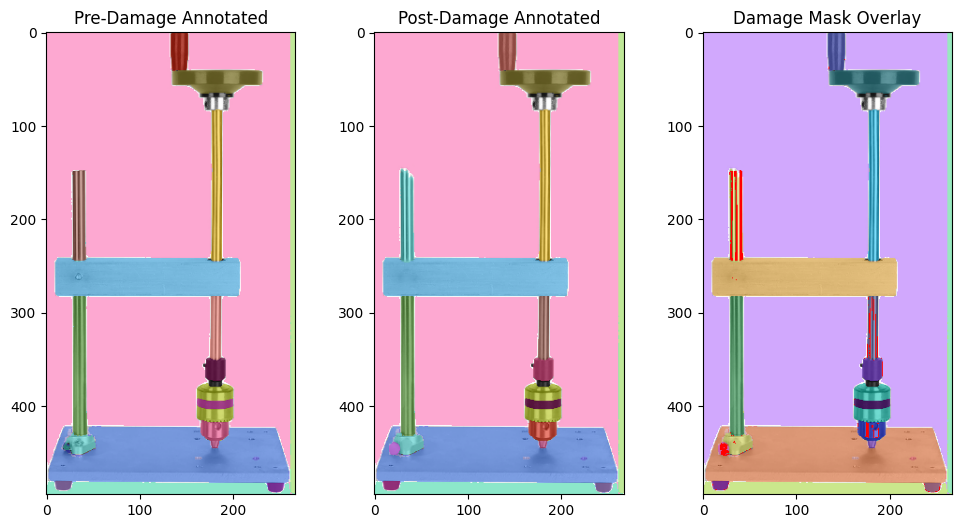

True

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load Images
pre_damage = cv2.imread("segmented_image_stand1.png", cv2.IMREAD_GRAYSCALE)
post_damage = cv2.imread("segmented_image_stand2.png", cv2.IMREAD_GRAYSCALE)

# Step 2: Threshold to Create Binary Masks (if not already binary)
_, pre_mask = cv2.threshold(pre_damage, 127, 1, cv2.THRESH_BINARY)
_, post_mask = cv2.threshold(post_damage, 127, 1, cv2.THRESH_BINARY)

# Step 3: Compute the Damage Mask
damage_mask = (post_mask - pre_mask).clip(0, 1)  # Highlight only new damages

# Step 4: Overlay Damage Mask on Post-Damage Image
post_damage_color = cv2.imread("segmented_image_stand2.png")  # Load post-damage image in color
damage_overlay = post_damage_color.copy()
damage_overlay[damage_mask == 1] = [0, 0, 255]  # Highlight damages in red

# Step 5: Display Results

pre_damage_show = cv2.imread("segmented_image_stand1.png")  # Color image (BGR)
post_damage_show = cv2.imread("segmented_image_stand2.png")
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title("Pre-Damage Annotated")
plt.imshow(pre_damage_show, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Post-Damage Annotated")
plt.imshow(post_damage_show, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Damage Mask Overlay")
plt.imshow(cv2.cvtColor(damage_overlay, cv2.COLOR_BGR2RGB))
plt.show()

# Step 6: Save the Damage Mask (Optional)
cv2.imwrite("damage_mask.png", (damage_mask * 255).astype(np.uint8))  # Save as a grayscale image


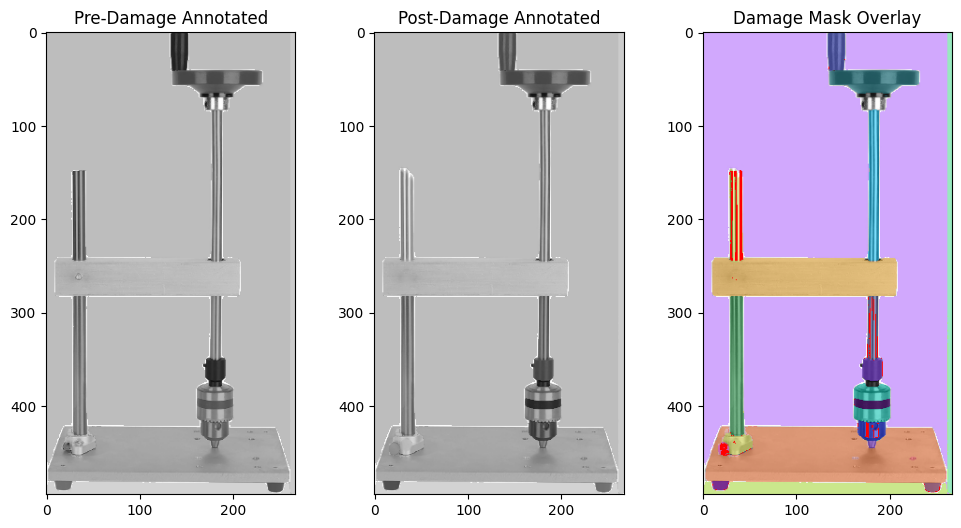

True

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load Images
pre_damage = cv2.imread("segmented_image_stand1.png", cv2.IMREAD_GRAYSCALE)
post_damage = cv2.imread("segmented_image_stand2.png", cv2.IMREAD_GRAYSCALE)

# Step 2: Threshold to Create Binary Masks (if not already binary)
_, pre_mask = cv2.threshold(pre_damage, 127, 1, cv2.THRESH_BINARY)
_, post_mask = cv2.threshold(post_damage, 127, 1, cv2.THRESH_BINARY)

# Step 3: Compute the Damage Mask
damage_mask = (post_mask - pre_mask).clip(0, 1)  # Highlight only new damages

# Step 4: Overlay Damage Mask on Post-Damage Image
post_damage_color = cv2.imread("segmented_image_stand2.png")  # Load post-damage image in color
damage_overlay = post_damage_color.copy()
damage_overlay[damage_mask == 1] = [0, 0, 255]  # Highlight damages in red

# Step 5: Convert Grayscale Images to 3-Channel for Display
pre_damage_color = cv2.cvtColor(pre_damage, cv2.COLOR_GRAY2BGR)
post_damage_color_display = cv2.cvtColor(post_damage, cv2.COLOR_GRAY2BGR)

# Step 6: Display Results
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title("Pre-Damage Annotated")
plt.imshow(cv2.cvtColor(pre_damage_color, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display

plt.subplot(1, 3, 2)
plt.title("Post-Damage Annotated")
plt.imshow(cv2.cvtColor(post_damage_color_display, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display

plt.subplot(1, 3, 3)
plt.title("Damage Mask Overlay")
plt.imshow(cv2.cvtColor(damage_overlay, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display

plt.show()

# Step 7: Save the Damage Mask (Optional)
cv2.imwrite("damage_mask.png", (damage_mask * 255).astype(np.uint8))  # Save as a grayscale image


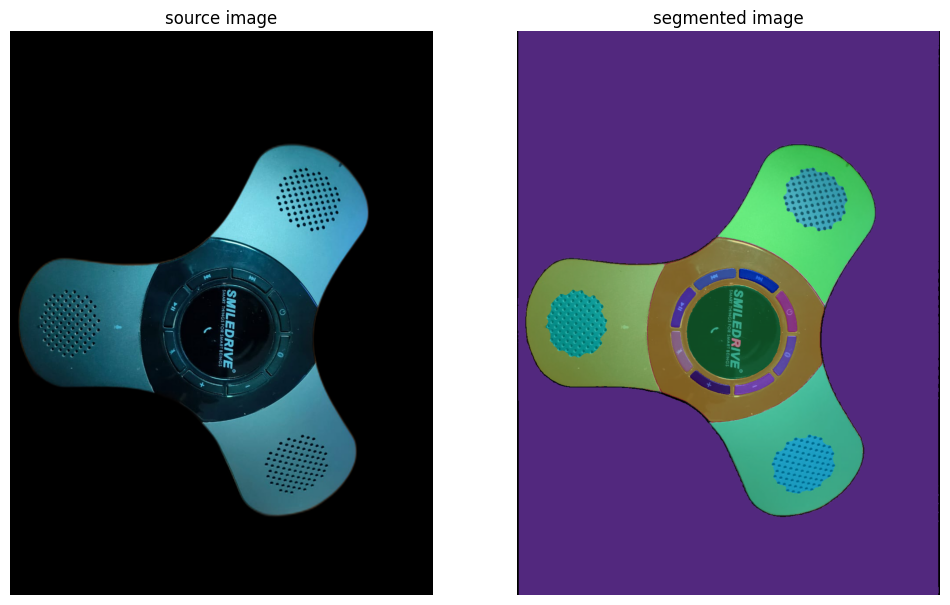

Segmented image saved to: segmented_image_speaker1.png


In [ ]:



import os

IMAGE_NAME = "/content/speaker_pre.png"
IMAGE_PATH = os.path.join(HOME, "data", IMAGE_NAME)

import cv2
import supervision as sv

image_bgr = cv2.imread(IMAGE_PATH)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

sam_result = mask_generator.generate(image_rgb)

mask_annotator = sv.MaskAnnotator(color_lookup=sv.ColorLookup.INDEX)

detections = sv.Detections.from_sam(sam_result=sam_result)

annotated_image = mask_annotator.annotate(scene=image_bgr.copy(), detections=detections)

sv.plot_images_grid(
    images=[image_bgr, annotated_image],
    grid_size=(1, 2),
    titles=['source image', 'segmented image']
)
output_path = "segmented_image_speaker1.png"  # Specify the file name and format
cv2.imwrite(output_path, annotated_image)

print(f"Segmented image saved to: {output_path}")


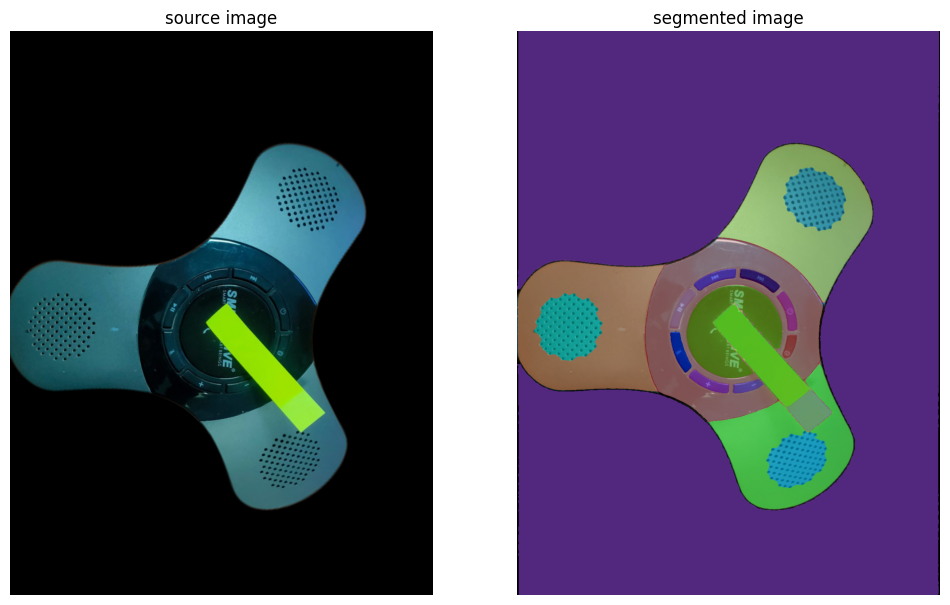

Segmented image saved to: segmented_image_speaker2.png


In [ ]:



import os

IMAGE_NAME = "/content/speaker_post.png"
IMAGE_PATH = os.path.join(HOME, "data", IMAGE_NAME)

import cv2
import supervision as sv

image_bgr = cv2.imread(IMAGE_PATH)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

sam_result = mask_generator.generate(image_rgb)

mask_annotator = sv.MaskAnnotator(color_lookup=sv.ColorLookup.INDEX)

detections = sv.Detections.from_sam(sam_result=sam_result)

annotated_image = mask_annotator.annotate(scene=image_bgr.copy(), detections=detections)

sv.plot_images_grid(
    images=[image_bgr, annotated_image],
    grid_size=(1, 2),
    titles=['source image', 'segmented image']
)
output_path = "segmented_image_speaker2.png"  # Specify the file name and format
cv2.imwrite(output_path, annotated_image)

print(f"Segmented image saved to: {output_path}")


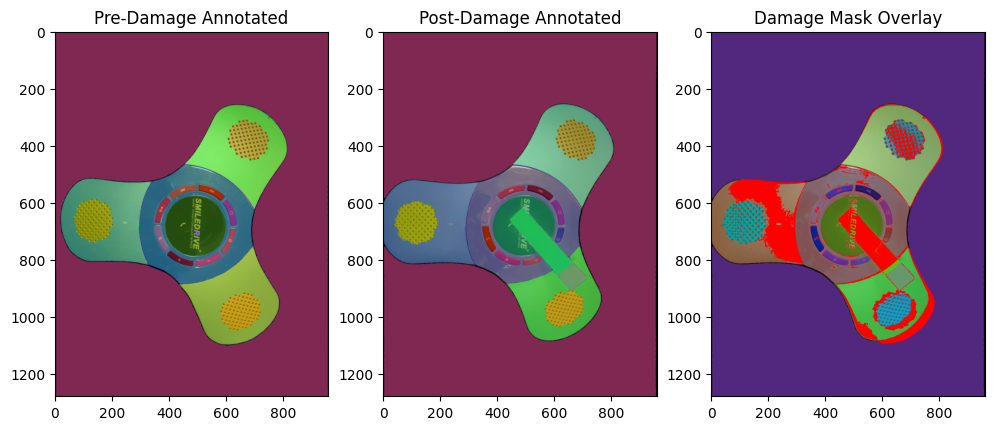

True

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load Images
pre_damage = cv2.imread("segmented_image_speaker1.png", cv2.IMREAD_GRAYSCALE)
post_damage = cv2.imread("segmented_image_speaker2.png", cv2.IMREAD_GRAYSCALE)

# Step 2: Threshold to Create Binary Masks (if not already binary)
_, pre_mask = cv2.threshold(pre_damage, 127, 1, cv2.THRESH_BINARY)
_, post_mask = cv2.threshold(post_damage, 127, 1, cv2.THRESH_BINARY)

# Step 3: Compute the Damage Mask
damage_mask = (post_mask - pre_mask).clip(0, 1)  # Highlight only new damages

# Step 4: Overlay Damage Mask on Post-Damage Image
post_damage_color = cv2.imread("segmented_image_speaker2.png")  # Load post-damage image in color
damage_overlay = post_damage_color.copy()
damage_overlay[damage_mask == 1] = [0, 0, 255]  # Highlight damages in red

# Step 5: Display Results

pre_damage_show = cv2.imread("segmented_image_speaker1.png")  # Color image (BGR)
post_damage_show = cv2.imread("segmented_image_speaker2.png")
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title("Pre-Damage Annotated")
plt.imshow(pre_damage_show, cmap='gray')

plt.subplot(1, 3, 2)
plt.title("Post-Damage Annotated")
plt.imshow(post_damage_show, cmap='gray')

plt.subplot(1, 3, 3)
plt.title("Damage Mask Overlay")
plt.imshow(cv2.cvtColor(damage_overlay, cv2.COLOR_BGR2RGB))
plt.show()

# Step 6: Save the Damage Mask (Optional)
cv2.imwrite("damage_mask.png", (damage_mask * 255).astype(np.uint8))  # Save as a grayscale image


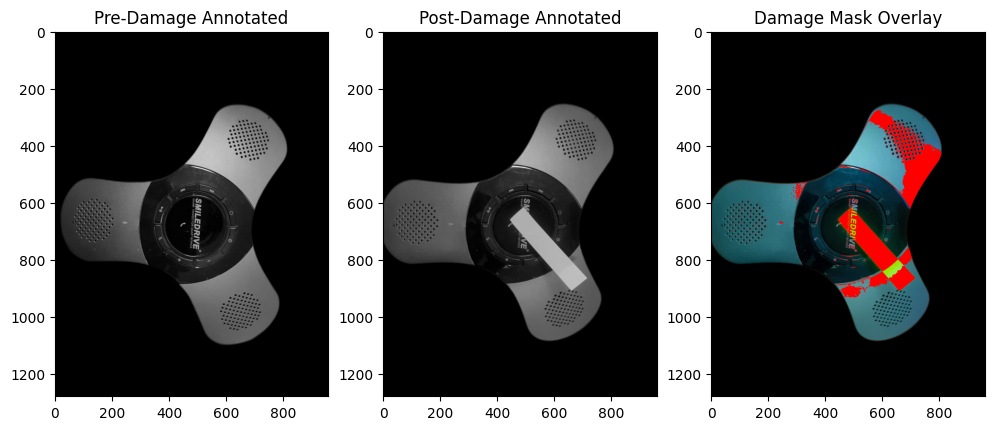

True

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load Images
pre_damage = cv2.imread("speaker_pre.png", cv2.IMREAD_GRAYSCALE)
post_damage = cv2.imread("speaker_post.png", cv2.IMREAD_GRAYSCALE)

# Step 2: Threshold to Create Binary Masks (if not already binary)
_, pre_mask = cv2.threshold(pre_damage, 127, 1, cv2.THRESH_BINARY)
_, post_mask = cv2.threshold(post_damage, 127, 1, cv2.THRESH_BINARY)

# Step 3: Compute the Damage Mask
damage_mask = (post_mask - pre_mask).clip(0, 1)  # Highlight only new damages

# Step 4: Overlay Damage Mask on Post-Damage Image
post_damage_color = cv2.imread("speaker_post.png")  # Load post-damage image in color
damage_overlay = post_damage_color.copy()
damage_overlay[damage_mask == 1] = [0, 0, 255]  # Highlight damages in red

# Step 5: Convert Grayscale Images to 3-Channel for Display
pre_damage_color = cv2.cvtColor(pre_damage, cv2.COLOR_GRAY2BGR)
post_damage_color_display = cv2.cvtColor(post_damage, cv2.COLOR_GRAY2BGR)

# Step 6: Display Results
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title("Pre-Damage Annotated")
plt.imshow(cv2.cvtColor(pre_damage_color, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display

plt.subplot(1, 3, 2)
plt.title("Post-Damage Annotated")
plt.imshow(cv2.cvtColor(post_damage_color_display, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display

plt.subplot(1, 3, 3)
plt.title("Damage Mask Overlay")
plt.imshow(cv2.cvtColor(damage_overlay, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display

plt.show()

# Step 7: Save the Damage Mask (Optional)
cv2.imwrite("damage_mask.png", (damage_mask * 255).astype(np.uint8))  # Save as a grayscale image


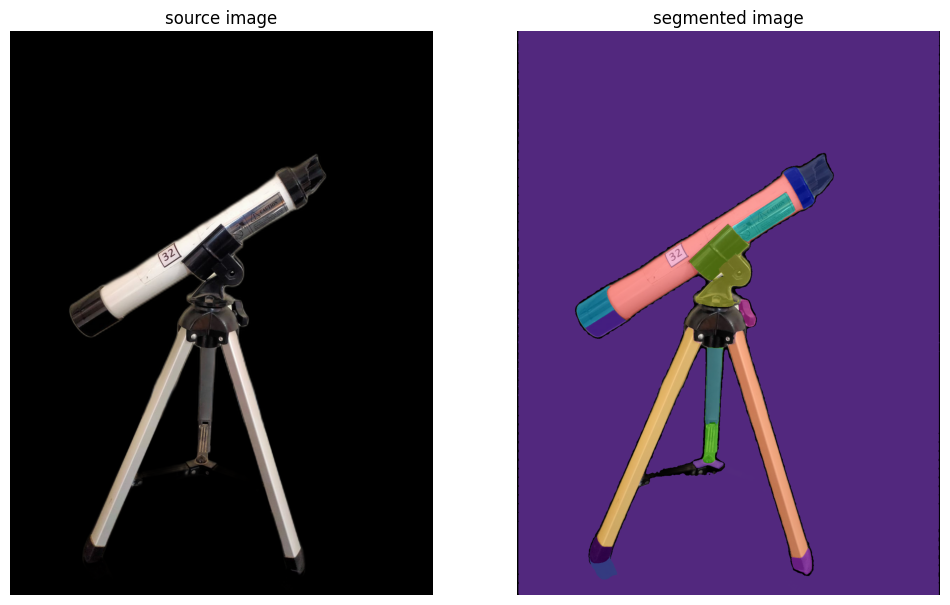

Segmented image saved to: segmented_image_telec1.png


In [ ]:



import os

IMAGE_NAME = "/content/Tele_pre_clear.jpg"
IMAGE_PATH = os.path.join(HOME, "data", IMAGE_NAME)

import cv2
import supervision as sv

image_bgr = cv2.imread(IMAGE_PATH)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

sam_result = mask_generator.generate(image_rgb)

mask_annotator = sv.MaskAnnotator(color_lookup=sv.ColorLookup.INDEX)

detections = sv.Detections.from_sam(sam_result=sam_result)

annotated_image = mask_annotator.annotate(scene=image_bgr.copy(), detections=detections)

sv.plot_images_grid(
    images=[image_bgr, annotated_image],
    grid_size=(1, 2),
    titles=['source image', 'segmented image']
)
output_path = "segmented_image_telec1.png"  # Specify the file name and format
cv2.imwrite(output_path, annotated_image)

print(f"Segmented image saved to: {output_path}")


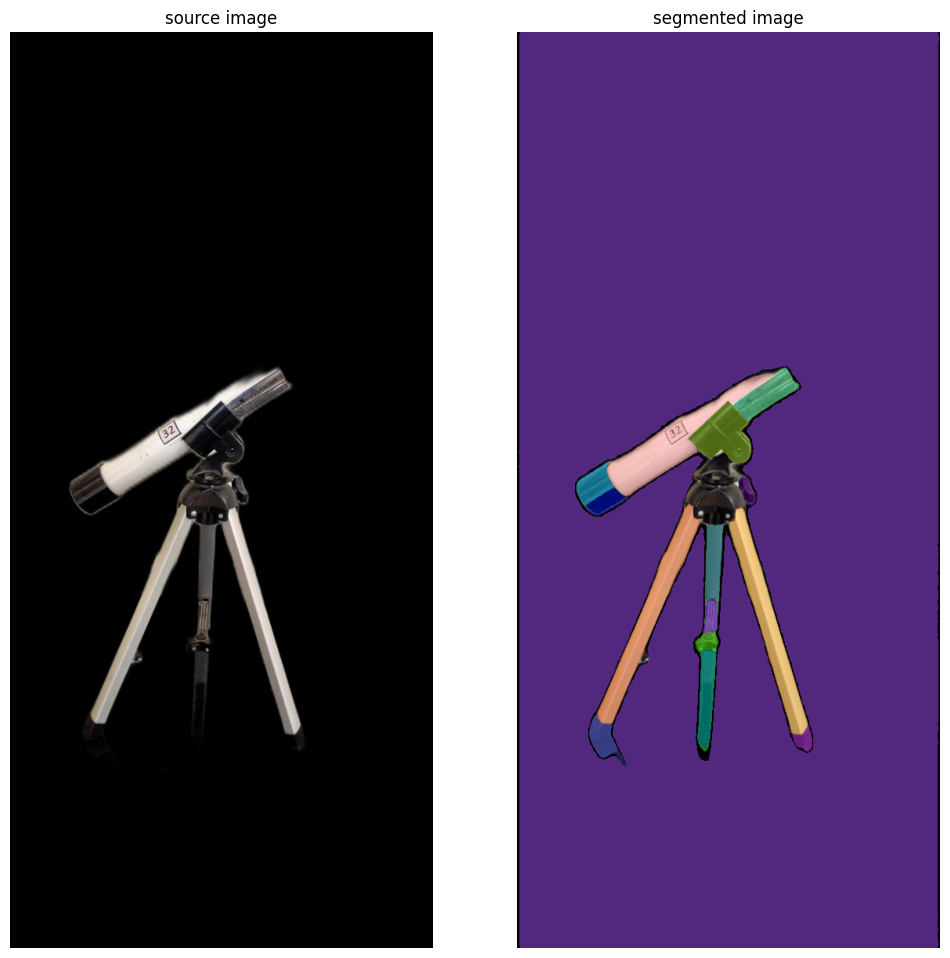

Segmented image saved to: segmented_image_telec2.png


In [ ]:



import os

IMAGE_NAME = "/content/Tele_post_clear.jpg"
IMAGE_PATH = os.path.join(HOME, "data", IMAGE_NAME)

import cv2
import supervision as sv

image_bgr = cv2.imread(IMAGE_PATH)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

sam_result = mask_generator.generate(image_rgb)

mask_annotator = sv.MaskAnnotator(color_lookup=sv.ColorLookup.INDEX)

detections = sv.Detections.from_sam(sam_result=sam_result)

annotated_image = mask_annotator.annotate(scene=image_bgr.copy(), detections=detections)

sv.plot_images_grid(
    images=[image_bgr, annotated_image],
    grid_size=(1, 2),
    titles=['source image', 'segmented image']
)
output_path = "segmented_image_telec2.png"  # Specify the file name and format
cv2.imwrite(output_path, annotated_image)

print(f"Segmented image saved to: {output_path}")


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load Images
pre_damage = cv2.imread("segmented_image_telec1.png", cv2.IMREAD_GRAYSCALE)
post_damage = cv2.imread("segmented_image_telec2.png", cv2.IMREAD_GRAYSCALE)

# Step 2: Threshold to Create Binary Masks (if not already binary)
_, pre_mask = cv2.threshold(pre_damage, 127, 1, cv2.THRESH_BINARY)
_, post_mask = cv2.threshold(post_damage, 127, 1, cv2.THRESH_BINARY)

# Step 3: Compute the Damage Mask
damage_mask = (post_mask - pre_mask).clip(0, 1)  # Highlight only new damages

# Step 4: Overlay Damage Mask on Post-Damage Image
post_damage_color = cv2.imread("segmented_image_telec2.png")  # Load post-damage image in color
damage_overlay = post_damage_color.copy()
damage_overlay[damage_mask == 1] = [0, 0, 255]  # Highlight damages in red

# Step 5: Convert Grayscale Images to 3-Channel for Display
pre_damage_color = cv2.cvtColor(pre_damage, cv2.COLOR_GRAY2BGR)
post_damage_color_display = cv2.cvtColor(post_damage, cv2.COLOR_GRAY2BGR)

# Step 6: Display Results
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title("Pre-Damage Annotated")
plt.imshow(cv2.cvtColor(pre_damage_color, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display

plt.subplot(1, 3, 2)
plt.title("Post-Damage Annotated")
plt.imshow(cv2.cvtColor(post_damage_color_display, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display

plt.subplot(1, 3, 3)
plt.title("Damage Mask Overlay")
plt.imshow(cv2.cvtColor(damage_overlay, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display

plt.show()

# Step 7: Save the Damage Mask (Optional)
cv2.imwrite("damage_mask.png", (damage_mask * 255).astype(np.uint8))  # Save as a grayscale image


ValueError: operands could not be broadcast together with shapes (1170,540) (1600,1200) 

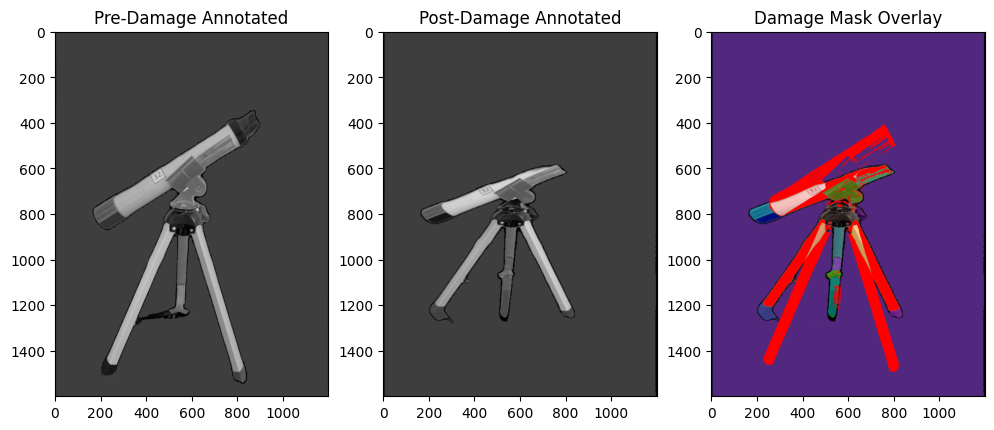

True

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load Images
pre_damage = cv2.imread("segmented_image_telec1.png", cv2.IMREAD_GRAYSCALE)
post_damage = cv2.imread("segmented_image_telec2.png", cv2.IMREAD_GRAYSCALE)

if pre_damage is None or post_damage is None:
    print("Error: One or both images could not be loaded. Please check the file paths.")
    exit()

# Step 2: Resize Images to Match Dimensions
if pre_damage.shape != post_damage.shape:
    post_damage = cv2.resize(post_damage, (pre_damage.shape[1], pre_damage.shape[0]))

# Step 3: Threshold to Create Binary Masks (if not already binary)
_, pre_mask = cv2.threshold(pre_damage, 127, 1, cv2.THRESH_BINARY)
_, post_mask = cv2.threshold(post_damage, 127, 1, cv2.THRESH_BINARY)

# Step 4: Compute the Damage Mask
damage_mask = (post_mask - pre_mask).clip(0, 1)  # Highlight only new damages

# Step 5: Overlay Damage Mask on Post-Damage Image
post_damage_color = cv2.imread("segmented_image_telec2.png")
if post_damage_color.shape[:2] != pre_damage.shape[:2]:
    post_damage_color = cv2.resize(post_damage_color, (pre_damage.shape[1], pre_damage.shape[0]))

damage_overlay = post_damage_color.copy()
damage_overlay[damage_mask == 1] = [0, 0, 255]  # Highlight damages in red

# Step 6: Convert Grayscale Images to 3-Channel for Display
pre_damage_color = cv2.cvtColor(pre_damage, cv2.COLOR_GRAY2BGR)
post_damage_color_display = cv2.cvtColor(post_damage, cv2.COLOR_GRAY2BGR)

# Step 7: Display Results
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.title("Pre-Damage Annotated")
plt.imshow(cv2.cvtColor(pre_damage_color, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display

plt.subplot(1, 3, 2)
plt.title("Post-Damage Annotated")
plt.imshow(cv2.cvtColor(post_damage_color_display, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display

plt.subplot(1, 3, 3)
plt.title("Damage Mask Overlay")
plt.imshow(cv2.cvtColor(damage_overlay, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB for display

plt.show()

# Step 8: Save the Damage Mask (Optional)
cv2.imwrite("damage_mask.png", (damage_mask * 255).astype(np.uint8))  # Save as a grayscale image
